# Example 8.2 - Posterior Predictive Check for Student's t-Distribution

In [9]:
%matplotlib inline
import pymc as pm
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import metropolis_commands as mc
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [5, 3]

In [10]:
df = pd.read_csv("./Daten/chemical_shifts.csv",header=None)
df.head()

,0
0,51.06
1,55.12
2,53.73
3,50.24
4,52.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ, σ, ν]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


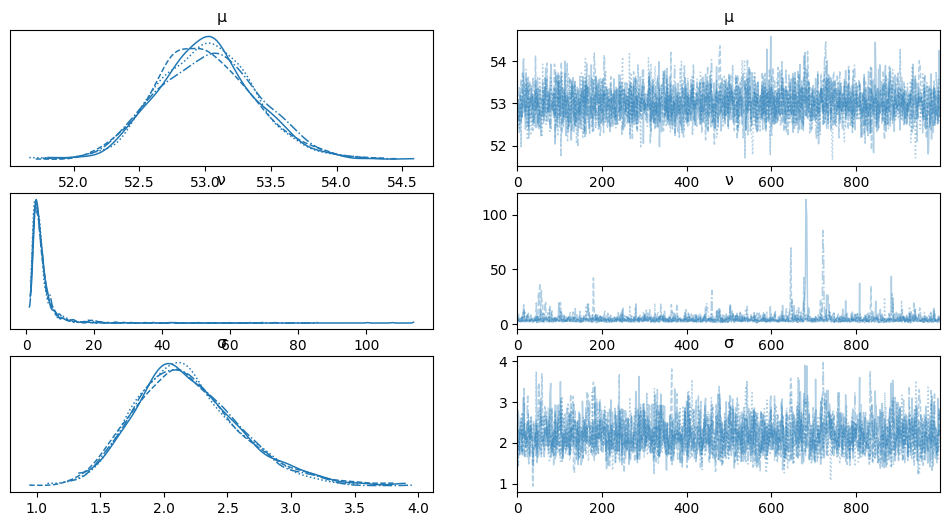

In [11]:
with pm.Model() as model_t:
    μ = pm.Uniform('μ', 40, 75)
    σ = pm.HalfNormal('σ', sigma=10)
    ν = pm.Exponential('ν', 1/30)
    y = pm.StudentT('y', nu=ν, mu=μ, sigma=σ, observed=df)
    trace_t = pm.sample(random_seed=4591)
az.plot_trace(trace_t);   

In [12]:
pm.sample_posterior_predictive(trace_t, model=model_t, extend_inferencedata=True, random_seed=123)

Sampling: [y]


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

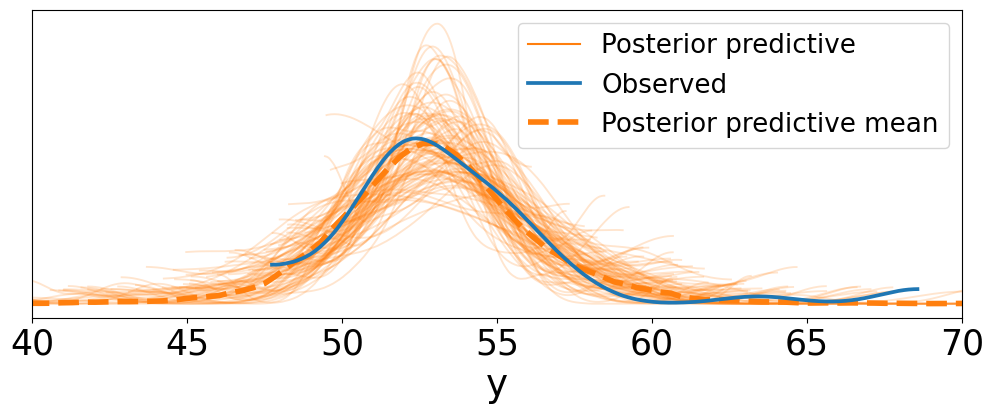

In [8]:
ax= az.plot_ppc(trace_t, figsize=(12, 4), num_pp_samples=100, colors=["C1", "C0", "C1"])
ax.set_xlim(40, 70)
plt.savefig("student_t.png")

Die Verwendung der Student's $t$-Verteilung in unserem Modell führt zu prädiktiven Stichproben, die offensichtlich besser zu den Daten zu passen scheinen, sowohl was die Lage des Modus der Verteilung als auch was ihre Streuung betrifft.

Man beachte, dass sich die Stichproben weit von der Masse der Daten entfernen und dass einige der prädiktiven Stichproben sehr flach aussehen. Dies ist eine direkte Folge der Student's $t$-Verteilung, die erwartet, dass einzelne Datenpunkte weit vom Mittelwert oder von der Masse der Daten entfernt sind. Die Student's $t$-Verteilung ermöglicht uns eine _robustere Schätzung_, da die Ausreißer den Effekt haben, dass sie $ \nu $ verringern (Verteilung wird flacher), anstatt den Mittelwert in ihre Richtung zu ziehen und die Standardabweichung zu erhöhen. 